In [1]:
import numpy as np

In [3]:
def sigmoid(x):
    out = 1 / (1 + np.exp(-x))
    return out

In [5]:
def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt

In [2]:
def model(X, W, b):
    '''模型

    Args:
        X: 模型输入向量
        W: 模型连接权重向量
        b: 模型的偏置值

    Return:
        返回模型输出结果
    '''
    X = np.array(X)
    
    return np.sum(X * W) + b

In [36]:
import itertools
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

num_train = 10000
num_test = 100

train_x, test_x, train_y, test_y = [itertools.cycle(i) for i in train_test_split(data[0], data[1], test_size=num_test)]

Text(0,0.5,'losses')

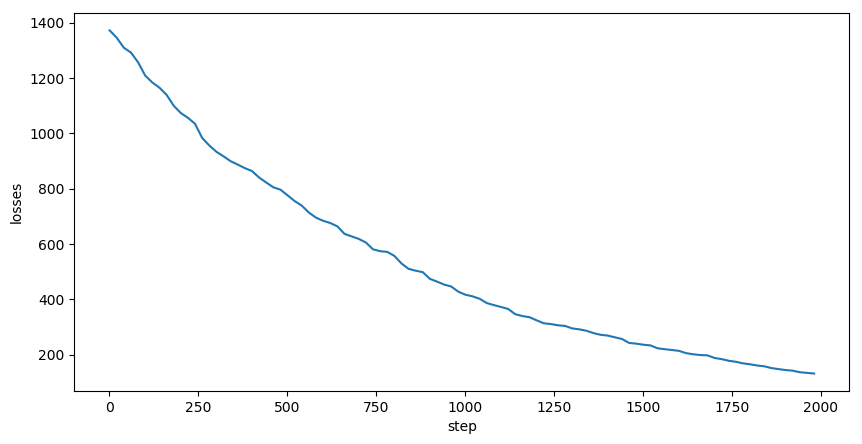

In [37]:
from sklearn.metrics import mean_squared_error as mse


train_steps = 2000   # 训练次数
lr = 0.01                    # 学习率
Summary_step = 16   # 摘要频率 
Summary = []            # 摘要
mini_batch = 16



W = np.random.randn(2)  # 初始化连接权重
b = 0   


#初始化累计梯度值
sum_dw = 0
sum_db =0


# 初始化偏置值
for i in range(train_steps):
    # 摘要
    if i % summary_step == 0:
        tmp = []
        for j in range(num_test):
            X = next(test_x)
            label = next(test_y)
            out = model(X, W, b)
            tmp.append(np.array([label, out]))
            
        tmp = np.array(tmp)
        # 计算均方误差代价
        loss = mse(tmp[:, 0], tmp[:, 1])
        Summary.append(np.array([i + 1, loss]))

    # 获得一个样本，并输入模型得到模型输出结果
    X = next(train_x)
    label = next(train_y)
    out = model(X, W, b)
    
    
    
    
    # 计算偏导数并更新模型参数
    dW = -X * (label - out)
    db = -1 * (label - out)
    
    sum_dw += dW
    sum_db += db
    
    #梯度累加到 mini_batch 大小
    if i % mini_batch == 0 or i == train_steps:
        if i == train_steps:
            W = W - lr * sum_dw / (train_steps % mini_batch)
            b = b - lr * sum_db / (train_steps % mini_batch)
        else:
            W = W - lr * sum_dw / mini_batch
            b = b - lr * sum_db / mini_batch
        sum_dw = 0
        sum_db = 0

    
    

# 可视化摘要
summary = np.array(Summary)    
plt.figure(figsize=[10, 5], dpi=100)
plt.plot(summary[:, 0], summary[:, 1])
plt.xlabel('step')
plt.ylabel('losses')